# Machine Learning

For my machine learning model, I wanted to find a way to predict what my expected sentiment online (for private messages and for public timeline data) might be depending on the specific year, month, day of the month, and time of day that I specify.

### First Step:
I first need to determine which model is going to provide the lowest mean squared error based on my training data: I'm going to try a LinearRegression model, a K-Nearest Neighbors model, and a LinearRegression Polynomial model (where the Day is the column in the training-data that becomes the polynomial).

In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import my data
messages = pickle.load(open("messages_score.pkl", "rb"))
timeline = pickle.load(open("timeline_score.pkl", "rb"))

In [3]:
messages.head()

,Year,Month,Day,Time,Text,Hour,Minutes,compound_score,neg_score,neu_score,pos_score
0,2015,May,11,24:28,smithygirl@gmail.com :) Good luck Sheridan! Ha...,12,28,0.9457,0.056,0.351,0.593
1,2013,August,21,17:00,Haha ya ill convert you next!!!,5,0,0.2677,0.262,0.375,0.363
2,2013,August,21,13:28,haha yeah I guess so! I saw that you took Loga...,1,28,0.6988,0.000,0.776,0.224
3,2013,August,21,13:26,I know who that is... I just don't know him pe...,1,26,0.5502,0.000,0.887,0.113
4,2013,August,21,13:25,Hold on its loading,1,25,0.0000,0.000,1.000,0.000


# Finding the optimal Messages Machine Learning Model:

## Linear Model:

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
months = pd.get_dummies(messages["Month"]).drop("January", axis=1)
dfs = [months, messages[["Year", "Day", "Hour", "Minutes", "compound_score"]]]
data_mess = pd.concat(dfs, axis=1)
model.fit(X=data_mess, y=data_mess["compound_score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
data_mess.columns

Index(['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Day', 'Hour',
       'Minutes', 'compound_score'],
      dtype='object')

In [6]:
from sklearn.model_selection import cross_val_score
linear_error = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Day', 'Hour',
       'Minutes']], data_mess["compound_score"], cv=10, scoring="neg_mean_squared_error").mean()
linear_error

0.14370794768130862

## Polynomial Linear Regression:

In [7]:
# YOUR CODE HERE.
y = data_mess["compound_score"]
data_mess["Day"] = data_mess["Day"].astype(int)
model = LinearRegression()

linear = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Day', 'Hour',
       'Minutes']], y, cv=10, scoring="neg_mean_squared_error").mean()

#quadratic model
data_mess["Day^2"] = data_mess["Day"] ** 2
quad = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#cubic model
data_mess["Day^3"] = data_mess["Day"] ** 3
cube = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2", "Day^3"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#quartic model
data_mess["Day^4"] = data_mess["Day"] ** 4
quart = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2", "Day^3", "Day^4"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#quintic model
data_mess["Day^5"] = data_mess["Day"] ** 5
quint = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#sixth degree model
data_mess["Day^6"] = data_mess["Day"] ** 6
six = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5", "Day^6"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#seventh degree model
data_mess["Day^7"] = data_mess["Day"] ** 7
seven = -cross_val_score(model, data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5", "Day^6", "Day^7"]], y, cv=10, scoring="neg_mean_squared_error").mean()



y = [linear, quad, cube, quart, quint, six, seven]

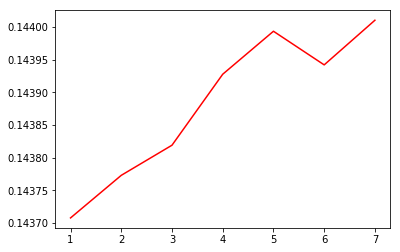

In [8]:
x = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x, y, 'r-')

#### Interpretation of Polynomial Models:
This shows me that when I create a polynomial model based on the Day attribute, my mean squared error is actually most optimized at the first degree (a linear model).

## K-Nearest Neighbors:
(First I'll need to determine the optimal number of neighbors)
## WARNING: 
The cell below takes about 15 to 16 minutes to run, I was computing all of the testing errors for different values of k. It does finish after about 16 minutes, but I wanted to warn you ahead of time!

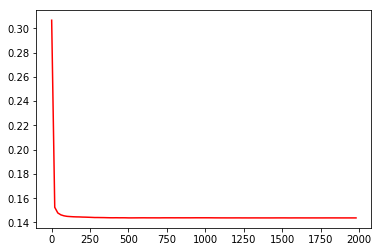

In [9]:
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 2000, 20)
X = data_mess[['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Hour',
       'Minutes', "Day"]]
y_test_errs = []
for k in range(1, 2000, 20):
    model2 = KNeighborsRegressor(n_neighbors=k)
    
    #test error
    y_test_errs.append(-cross_val_score(model2, X, data_mess["compound_score"], cv=10, scoring="neg_mean_squared_error").mean())

import matplotlib.pyplot as plt
#testing
plt.plot(x, y_test_errs, 'r-')

##### Interpretation:
This was very interesting, because it seems that my k-nearest neighbors model flatlines at about k = 25. I checked the y_test_errs array and found that once k = 20, the values do continually decrease still, but at a very very small rate. I did notice though that by the 25th point in my y_test_errs aray, my mean-squared-error value was at about the lowest it could be before it started fluctuating back and forth. So I decided to go with the k_neighbors at x = 25, in this case that was k =  501

In [10]:
x = range(1, 2000, 20)
x[25]

501

In [11]:
y_test_errs

[0.30669049536244541,
 0.1525090555524759,
 0.14784507659837171,
 0.14628077498802489,
 0.14549557496013274,
 0.14505378041192279,
 0.14487096936213079,
 0.14471125307812605,
 0.14461319297556391,
 0.14457003818710135,
 0.14445383228754105,
 0.14439722791134979,
 0.14430149211779553,
 0.1442017092878643,
 0.14408793875771334,
 0.14408519282496857,
 0.1440426476238344,
 0.14401480313037165,
 0.14394673773155689,
 0.14389187236822693,
 0.14387707853106463,
 0.14390791842971543,
 0.14386268415828657,
 0.14388022334505859,
 0.14385813819078724,
 0.14378864268893499,
 0.14378889298404141,
 0.14380987183973523,
 0.14382351709708865,
 0.1438435366281422,
 0.14385351490040293,
 0.14382704324676437,
 0.14382163463618203,
 0.14382567647862748,
 0.14381651675751922,
 0.14380480308180138,
 0.14384284285733995,
 0.14385451664830937,
 0.14384891035895891,
 0.14386121563653526,
 0.14384556317769093,
 0.14385559264452388,
 0.14384348248423676,
 0.14383873624679377,
 0.14384771022765877,
 0.14383964673

##### This proves that my k-nearest neighbors model with n_neighbors = 301 isn't as optimal of a model for my training-data as the linear model is for messages, so the winner for my messages data is the Linear model of degree 1:

In [12]:
X = data_mess[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Day', 'Hour', 'Minutes']]
model2 = KNeighborsRegressor(n_neighbors=501)
    
k_neighbors_error = -cross_val_score(model2, X, data_mess["compound_score"], cv=10, scoring="neg_mean_squared_error").mean()
k_neighbors_error, linear_error

(0.14379053840571326, 0.14370794768130862)

# Finding the optimal Timeline Machine Learning Model:
(Same explorations as above, but for my timeline data to figure out which model has the smallest error)

## Linear Model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
months = pd.get_dummies(timeline["Month"]).drop("January", axis=1)
dfs = [months, timeline[["Year", "Day", "Hour", "Minutes", "compound_score"]]]
data_time = pd.concat(dfs, axis=1)
model.fit(X=data_time, y=data_time["compound_score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
data_time.columns

Index(['April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Year', 'Day', 'Hour',
       'Minutes', 'compound_score'],
      dtype='object')

In [15]:
from sklearn.model_selection import cross_val_score
-cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Day', 'Hour', 'Minutes']], data_time["compound_score"], cv=10, scoring="neg_mean_squared_error").mean()

0.16967377765275374

## K-Nearest Neighbors

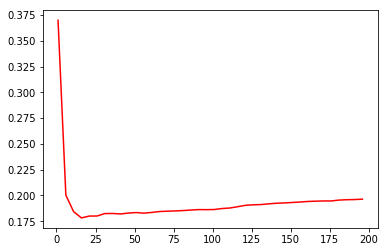

In [16]:
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 200, 5)
X = data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Day', 'Hour', 'Minutes']]
y_test_errs = []
for k in range(1, 200, 5):
    model2 = KNeighborsRegressor(n_neighbors=k)
    
    #test error
    y_test_errs.append(-cross_val_score(model2, X, data_time["compound_score"], cv=10, scoring="neg_mean_squared_error").mean())

import matplotlib.pyplot as plt
#testing
plt.plot(x, y_test_errs, 'r-')

##### Interpretation:
It seems as though my timeline data doesn't flatline as the number of neighbors increases like my messages data did! For the timeline, the optimized number of neighbors was at the 10th data point, in this case that is when n_neighbors = 51.

In [17]:
x[10]

51

In [18]:
model2 = KNeighborsRegressor(n_neighbors=51)
    
k_neighbors_error = -cross_val_score(model2, X, data_time["compound_score"], cv=10, scoring="neg_mean_squared_error").mean()
k_neighbors_error

0.18340554586767893

## Polynomial Linear Regression

In [19]:
# YOUR CODE HERE.
y = data_time["compound_score"]
data_time["Day"] = data_time["Day"].astype(int)
model = LinearRegression()

linear = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#quadratic model
data_time["Day^2"] = data_time["Day"] ** 2
quad = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#cubic model
data_time["Day^3"] = data_time["Day"] ** 3
cube = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#quartic model
data_time["Day^4"] = data_time["Day"] ** 4
quart = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3", "Day^4"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#quintic model
data_time["Day^5"] = data_time["Day"] ** 5
quint = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#sixth degree model
data_time["Day^6"] = data_time["Day"] ** 6
six = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5", "Day^6"]], y, cv=10, scoring="neg_mean_squared_error").mean()

#seventh degree model
data_time["Day^7"] = data_time["Day"] ** 7
seven = -cross_val_score(model, data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3", "Day^4", "Day^5", "Day^6", "Day^7"]], y, cv=10, scoring="neg_mean_squared_error").mean()



y = [linear, quad, cube, quart, quint, six, seven]

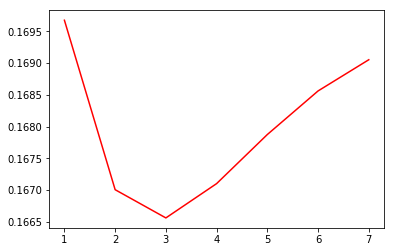

In [20]:
x = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x, y, 'r-')

##### Interpretation:
Looks like for my timeline data, the optimal polynomial model to be fit on the Days is actually a 3rd degree model! I will compare this to my k-nearest neighbors model to see which actually produces the smallest error.

In [21]:
cube, k_neighbors_error

(0.16656193465951877, 0.18340554586767893)

### Next Step:
Looks like the most optimal models for my data are:
- For my timeline data it is using a cubic linear regression model for the Day, and then also using the values for Year, Month, Hour, and Minute in my training-data.
- For my messages, it's using a linear regression model for day, and then also using the values for Year, Month, Hour, and Minute in my training-data

Time to create functions that allow me to specify which attributes I'd like to know my predicted compound_score for sentiment!

In [22]:
#helper function to make the input easier on the user but convert it to a useable array for the prediction values
def get_prediction_array_timeline(year, month, day, hour, minute):

    months = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if(month == 'April'):
        months[1] = 1
    elif(month == 'August'):
        months[2] = 1
    elif(month == 'December'):
        months[3] = 1
    elif(month == 'February'):
        months[4] = 1
    elif(month == 'July'):
        months[5] = 1
    elif(month == 'June'):
        months[6] = 1
    elif(month == 'March'):
        months[7] = 1
    elif(month == 'May'):
        months[8] = 1
    elif(month == 'November'):
        months[9] = 1
    elif(month == 'October'):
        months[10] = 1
    elif(month == 'September'):
        months[11] = 1
        
    return_year = [year]
    return_hour = [hour]
    return_minutes = [minute]
    return_day = [day]
    return_day_2 = [day ** 2]
    return_day_3 = [day ** 3]
    total_return = return_year + months + return_hour + return_minutes + return_day + return_day_2 + return_day_3
    return(total_return)
    

In [23]:
# Timeline
def getTimelinePrediction(year, month, day, hour, minute):
    prediction_values = get_prediction_array_timeline(year, month, day, hour, minute)
    X = data_time[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Hour', 'Minutes', "Day", "Day^2", "Day^3"]]
    model = LinearRegression()
    model.fit(X, data_time["compound_score"])
    return(model.predict([prediction_values]))

In [24]:
#Test for Timeline
getTimelinePrediction(2020, "February", 30, 9, 40)

array([ 0.40532781])

In [25]:
#helper function to make the input easier on the user but convert it to a useable array for the prediction values
def get_prediction_array_messages(year, month, day, hour, minute):
    
    months = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if(month == 'April'):
        months[1] = 1
    elif(month == 'August'):
        months[2] = 1
    elif(month == 'December'):
        months[3] = 1
    elif(month == 'February'):
        months[4] = 1
    elif(month == 'July'):
        months[5] = 1
    elif(month == 'June'):
        months[6] = 1
    elif(month == 'March'):
        months[7] = 1
    elif(month == 'May'):
        months[8] = 1
    elif(month == 'November'):
        months[9] = 1
    elif(month == 'October'):
        months[10] = 1
    elif(month == 'September'):
        months[11] = 1
        
    return_year = [year]
    return_hour = [hour]
    return_minutes = [minute]
    return_day = [day]
    total_return = return_year + months + return_hour + return_minutes + return_day
    return(total_return)
    

In [26]:
# Messages
def getMessagePrediction(year, month, day, hour, minute):
    prediction_values = get_prediction_array_messages(year, month, day, hour, minute)
    X = data_mess[["Year", 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Day', 'Hour', 'Minutes']]
    model2 = LinearRegression()
    model2.fit(X, data_mess["compound_score"])
    return(model2.predict([prediction_values]))

In [27]:
#Test for messages
getMessagePrediction(2020, "February", 30, 9, 40)

array([ 0.30208632])

### Examples:
Now I have created functions that allow me input the year, month, day, hour, and minute and recieve an estimated value for my sentiment at that exact moment for both my timeline posts and my messages! I decided to try it out below with some future predictions and then some past predictions:

In [28]:
getTimelinePrediction(2020, "December", 30, 9, 40), getMessagePrediction(2020, "December", 30, 9, 40)

(array([ 0.46432285]), array([ 0.26760247]))

In [29]:
getTimelinePrediction(2020, "February", 30, 9, 40), getMessagePrediction(2020, "February", 30, 9, 40)

(array([ 0.40532781]), array([ 0.30208632]))

In [30]:
getTimelinePrediction(2005, "February", 30, 9, 40), getMessagePrediction(2000, "February", 30, 9, 40)

(array([ 0.0347635]), array([ 0.35929838]))

In [31]:
getTimelinePrediction(2011, "February", 30, 9, 40), getMessagePrediction(2011, "February", 30, 9, 40)

(array([ 0.18298923]), array([ 0.32783175]))

##### Note: This also proves my discoveries from my analysis before because all of my timeline values are higher than my message values after 2014, but they are lower before then (which was when I determined that I used Facebook as more of a blog and posted personal, and more negative things on my Timeline than my messages).

## Final Analysis:
Overall, this was definitely a very interesting experiment for me. Throughout this class, I not only found out how to conduct research on data, but I also realized the incredible power of big data and how it could so easily be used in unethical ways. It was very interesting to experience both sides of big data with my classes this quarter: learning how to collect, analyze, and draw conclusions from it in Data Science, and then learning the implications of this in the real world through my Computer Ethics class. In this experiment specifically, I learned so much about my sentiment and my private vs. my public life just by taking two samples of the giant dataset that Facebook has collected from me. It has definitely convinced me to be a more mindful social media user, not only to be more truthful to my honest sentiment pubicly, but also to be more aware of how people could use my data to define and identify me. I think that I couldn't have asked for a better eye-opener.